# **Capstone project: Providing data-driven suggestions for HR**

**Resumo do Projeto**: Este projeto representa um esforço estratégico da Salifort Motors para aprimorar a gestão de seus talentos utilizando análise de dados avançada. Como profissional de dados da empresa, o objetivo é apresentar uma visão clara e concisa de nossas descobertas e recomendações para stakeholders externos.

**Abordagem Analítica**: O cerne deste projeto é o desenvolvimento de um modelo preditivo que determina a probabilidade de um funcionário deixar a empresa. Para atingir este objetivo, optamos por uma de duas abordagens avançadas: um modelo de regressão ou um modelo de aprendizado de máquina. Cada uma dessas metodologias oferece uma perspectiva única e valiosa na previsão da rotatividade dos funcionários, e o exemplar fornecido neste projeto ilustra ambas as abordagens. No entanto, focamos em apenas uma delas para garantir uma análise aprofundada e específica.

**Importância e Impacto**: A capacidade de prever a saída de funcionários não é apenas uma ferramenta estratégica para a gestão de RH, mas também uma alavanca crítica para o sucesso operacional e financeiro da empresa. Compreender e mitigar os fatores que levam à rotatividade de funcionários pode resultar em uma força de trabalho mais engajada, redução de custos associados à contratação e treinamento de novos empregados, e uma cultura corporativa mais robusta.


**Metodologia Escolhida - PACE**:
- **P - Plan**: Compreender os dados no contexto do problema.
- **A - Analyze**: Análise Exploratória de Dados (EDA), verificação das suposições do modelo e seleção do modelo.
- **C - Construct**: Construir e avaliar o modelo.
- **E - Execute**: Interpretar o modelo e compartilhar a história.






# PLANEJAMENTO: Plan Stage




**Contexto e Objetivo do Projeto**: A Salifort Motors, através de seu departamento de Recursos Humanos, busca melhorar os níveis de satisfação dos funcionários na empresa. Eles coletaram dados dos empregados, mas enfrentam desafios em como utilizar essas informações de forma eficaz. Eles recorreram a você, um profissional de análise de dados, para fornecer sugestões baseadas em dados que possam ajudar a entender e melhorar a situação.

**Pergunta Chave**: A questão central do projeto é identificar o que provavelmente faz um funcionário deixar a empresa. Compreender esses fatores é crucial para desenvolver estratégias eficazes de retenção de talentos.

**Metas do Projeto**: 
- **Análise de Dados**: Examinar e analisar os dados coletados pelo departamento de RH para identificar padrões e insights significativos.
- **Modelagem Preditiva**: Construir um modelo que possa prever se um funcionário está propenso a deixar a empresa. Essa previsão é fundamental para identificar proativamente os funcionários em risco de saída.

**Importância do Projeto**: A previsão de funcionários propensos a sair oferece a oportunidade de identificar fatores que contribuem para a rotatividade. Isso é especialmente relevante considerando o tempo e o custo associados à busca, entrevista e contratação de novos funcionários. Aumentar a retenção de funcionários não só melhora o ambiente de trabalho, mas também traz benefícios econômicos significativos para a empresa.



### O dataset a ser estudado:

Neste [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), existem 14,999 linhas, 10 colunas, e as seguintes variáveis: 

Variável |Descrição |
-----|-----| 
satisfaction_level|: Representa o nível de satisfação do trabalho auto-relatado pelo funcionário[0&ndash;1]|
last_evaluation|Reflete a pontuação da última avaliação de desempenho do funcionário [0&ndash;1]|
number_project|Quantifica o número de projetos aos quais o funcionário contribui|
average_monthly_hours|Indica o número médio de horas trabalhadas por mês|
time_spend_company|Mostra a duração, em anos, que o funcionário esteve com a empresa
Work_accident|Registra se o funcionário teve algum acidente de trabalho
left|Indica se o funcionário deixou a empresa
promotion_last_5years|Identifica se o funcionário foi promovido nos últimos cinco anos
Department|Especifica o departamento do funcionário
salary|Relata a remuneração do funcionário (U.S. dollars)

### Importação das Bibliotecas

In [96]:
# Importação das bibliotecas

# Para manipulação de dados
import numpy as np
import pandas as pd

# Para visualização de dados
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Para exibir todas as colunas nos dataframes
pd.set_option('display.max_columns', None)

# Para modelagem de dados
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Para métricas e funções úteis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Para salvar modelos
import pickle


### Carregar o dataset

In [97]:
# Carregando o conjunto de dados em um dataframe
df0 = pd.read_csv("C:/Users/Guilherme Brevilato/Documents/Arquivos Curso - Google Advanced/GoogleADA-main/7 - Capstone/HR_capstone_dataset.csv")

# Exibindo as primeiras linhas do dataframe
df0.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  promotion_last_5years department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

## Data Exploration (Aplicação inicial do método EDA e cleaning data)

### Coleta de informação básica do dataset

In [98]:
# Informações básicas sobre os dados
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Coleta das estatísticas descritivas básicas

In [99]:
# Estatísticas descritivas sobre os dados
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours  time_spend_company  work_accident  \
count           14999.000000        14999.000000   14999.000000   
mean              201.050337            3.498233       0.144610   
std                49.943099            1.460136       0.351719   
min                96.000000            2.000000       0.000000   
25%               156.000000            3.000000       0.000000   
50%               200.000000            3.000000       0.000000   
75%               245.000000            4.000000       0.000000   
max               310.000000           10.000000       1.000000   

       promotion_last_5years          left  
count           14999.000000  14999.000000  
mean                0.021268      0.238083  
std                 0.144281      0.425924  
min                 0.000000      0.000000  
25%                 0.000000      0.000000  
50%                 0.000000      0.000000  
75%                 0.000000      0.000000  
max                 1.000000      1.000000

### Renomear as colunas

Como uma etapa de limpeza de dados, foi renomeado as colunas a fim de padronizar os nomes para que todas estejam em snake_case.


In [100]:
# Todos os nomes das colunas
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [101]:
# Renomeando colunas para funcionar corretamente
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Todos os nomes das colunas após a atualização
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

### Análise de valores ausentes

In [102]:
# Verificando a existência de valores ausentes
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

### Análise da presença de dados duplicados

In [103]:
# Verificando a existência de duplicatas
df0.duplicated().sum()

3008

3.008 linhas contêm duplicatas. Isso corresponde a 20% dos dados.

In [9]:
# Inspecionando a existência de linhas duplicadas
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  promotion_last_5years  \
396                     139       3              0                      0   
866                     128       3              0                      0   
1317                    127       3              0                      0   
1368                    132       3              0                      0   
1461                    142       3              0                      0   

      department  salary  left  
396        sales     low     1  
866   accounting     low     1  
1317       sales  medium     1  
1368       RandD     low     1  
1461       sales     low     1

O output acima mostra os valores duplicados no dataframe. A questão a ser analisada é o quão provável que essas sejam entradas legítimas? Por exemplo, quão plausível é que dois funcionários tenham relatado exatamente a mesma resposta para cada coluna?

Poderíamos realizar uma análise de probabilidade essencialmente aplicando o teorema de Bayes e multiplicando as probabilidades a fim de encontrar cada valor em cada coluna, mas, em meu ponto de vista, isso não parece necessário. Com diversas variáveis contínuas em 10 colunas, parece muito improvável que essas observações duplicadas sejam legítimas. Irei apenas excluir estes valores.

In [10]:
# Eliminando valores duplicados do dataframe
df1 = df0.drop_duplicates(keep='first')

### Análise de outliers

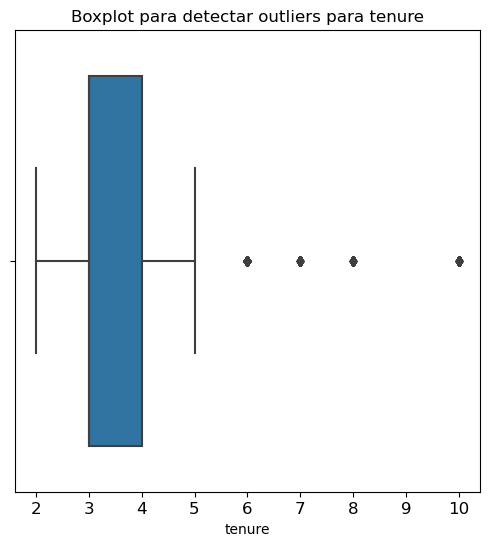

In [11]:
# Boxplot para visualizar a distribuição de `tenure` e detectar outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot para detectar outliers para tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

O boxplot acima mostra que existem outliers na variável tenure.

In [12]:
# Número de linhas que contêm outliers

# O valor do 25º percentil em `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# O valor do 75º percentil em `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# O intervalo interquartil em `tenure`
iqr = percentile75 - percentile25

# O limite superior e inferior para valores não outliers em `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Limite inferior:", lower_limit)
print("Limite superior:", upper_limit)

# Identificando subconjunto de dados que contêm outliers em `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Contando quantas linhas nos dados contêm outliers em `tenure`
print("Número de linhas nos dados que contêm outliers em `tenure`:", len(outliers))

Limite inferior: 1.5
Limite superior: 5.5
Número de linhas nos dados que contêm outliers em `tenure`: 824



# ANÁLISE: Analyze Stage
- Performar práticas EDA e análise do relacionamento entre as variáveis 



## Exploração dos dados (Continuação do EDA)

### Data visualizations

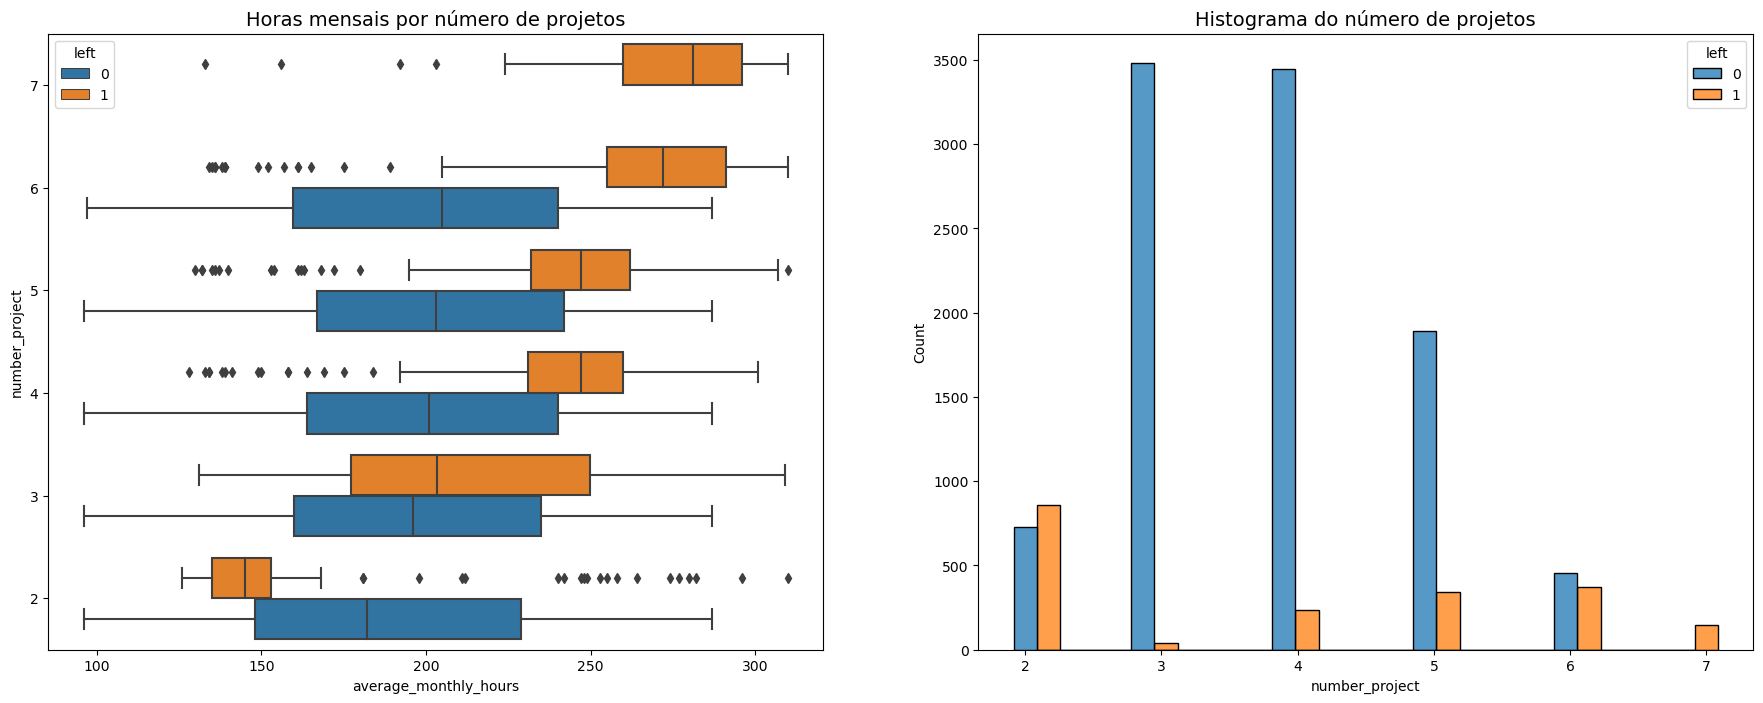

In [104]:
# Examinar a relação entre a quantidade de horas trabalhadas versus quantidade de projeto para os funcionários que saíram e os que permaneceram
# Na legenda cor azul representa funcionários que não saíram, cor laranja representa funcionários que saíram
# Configurando figura e eixos
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot mostrando as distribuições de `average_monthly_hours` para `number_project`, comparando funcionários que ficaram versus os que saíram
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Horas mensais por número de projetos', fontsize='14')

# Histograma mostrando a distribuição de `number_project`, comparando funcionários que ficaram versus os que saíram
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Histograma do número de projetos', fontsize='14')

# Exibindo os gráficos
plt.show()

De acordo com a distribuição dos dados é possíveis identificar que a quantidade de hora despendida pela quantidade de projetos executados, pode-se tirar a seguinte conclusão:

    Se assumirmos uma semana de trabalho de 40 horas e 30 dias de férias por ano, então o número médio de horas trabalhadas por mês dos funcionários que trabalham de segunda a sexta-feira = 48 semanas * 40 horas por semana / 12 meses = 160 horas por mês. Muitos dos que deixarm a empresa cumpriram além, e em alguns casos muito além, desta jornada de trabalho apresentada. Sendo que todos os funcionários que participaram de 7 projetos saíram da empresa.


In [14]:
# Obtendo a contagem de valores de funcionários com 7 projetos que ficaram e saíram
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

Isso confirma que todos que participaram 7 projetos saíram da empresa. 

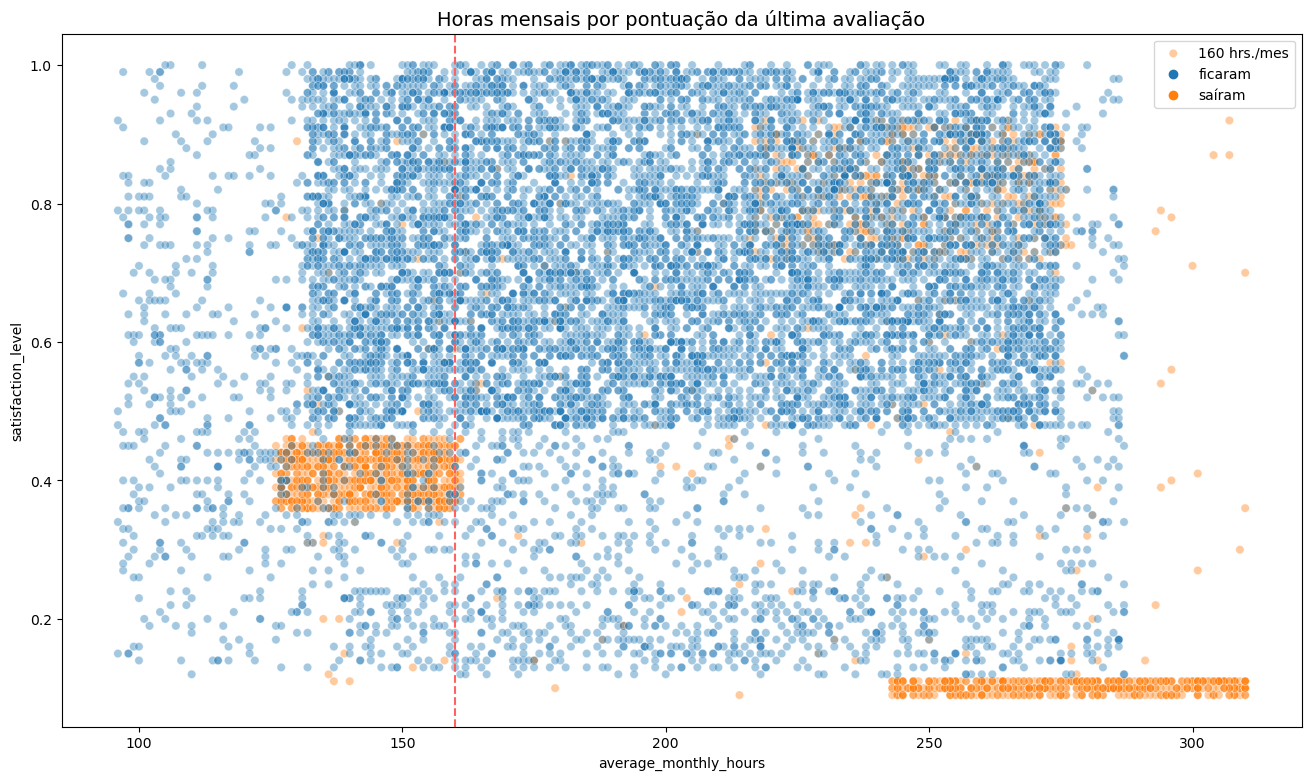

In [15]:
# Analizando as horas médias mensais versus os níveis de satisfação.

# Plotando um gráfico de dispersão de `average_monthly_hours` versus `satisfaction_level`, comparando funcionários que ficaram versus os que saíram
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', label='160 hrs./mes', ls='--')
plt.legend(labels=['160 hrs./mes','ficaram', 'saíram'])
plt.title('Horas mensais por pontuação da última avaliação', fontsize='14');

O gráfico de dispersão acima mostra que havia um grupo considerável de funcionários que trabalhavam aproximadamente 240–315 horas por mês. Trabalhar 315 horas por mês equivale a mais de 75 horas por semana durante um ano inteiro. É provável que isso esteja relacionado ao fato de seus níveis de satisfação estarem próximos de zero.

O gráfico também mostra outro grupo de pessoas que saíram, aquelas que tinham horas de trabalho mais normais, ou seja, dentro do limite de 40 horas. Mesmo assim, a satisfação delas estava apenas por volta de 0.4. É difícil especular sobre o motivo pelo qual elas podem ter saído. É possível que se sentissem pressionadas a trabalhar mais, considerando que muitos de seus colegas trabalhavam mais. E essa pressão poderia ter reduzido seus níveis de satisfação.

Finalmente, há um grupo que trabalhou aproximadamente 210–280 horas por mês, e eles tinham níveis de satisfação variando aproximadamente entre 0.7 e 0.9.

Também é possível notar um formato estranho das distribuições aqui. Isso é indicativo de **manipulação** de dados ou **dados sintéticos**.

O próximo gráfico será sobre os níveis de satisfação de acordo com a variável tenure, ou seja, o nivel de satisfação dos funcionários que saíram e os que permaneceram versus a quantidade de tempo que eles tem/tiveram de empresa.

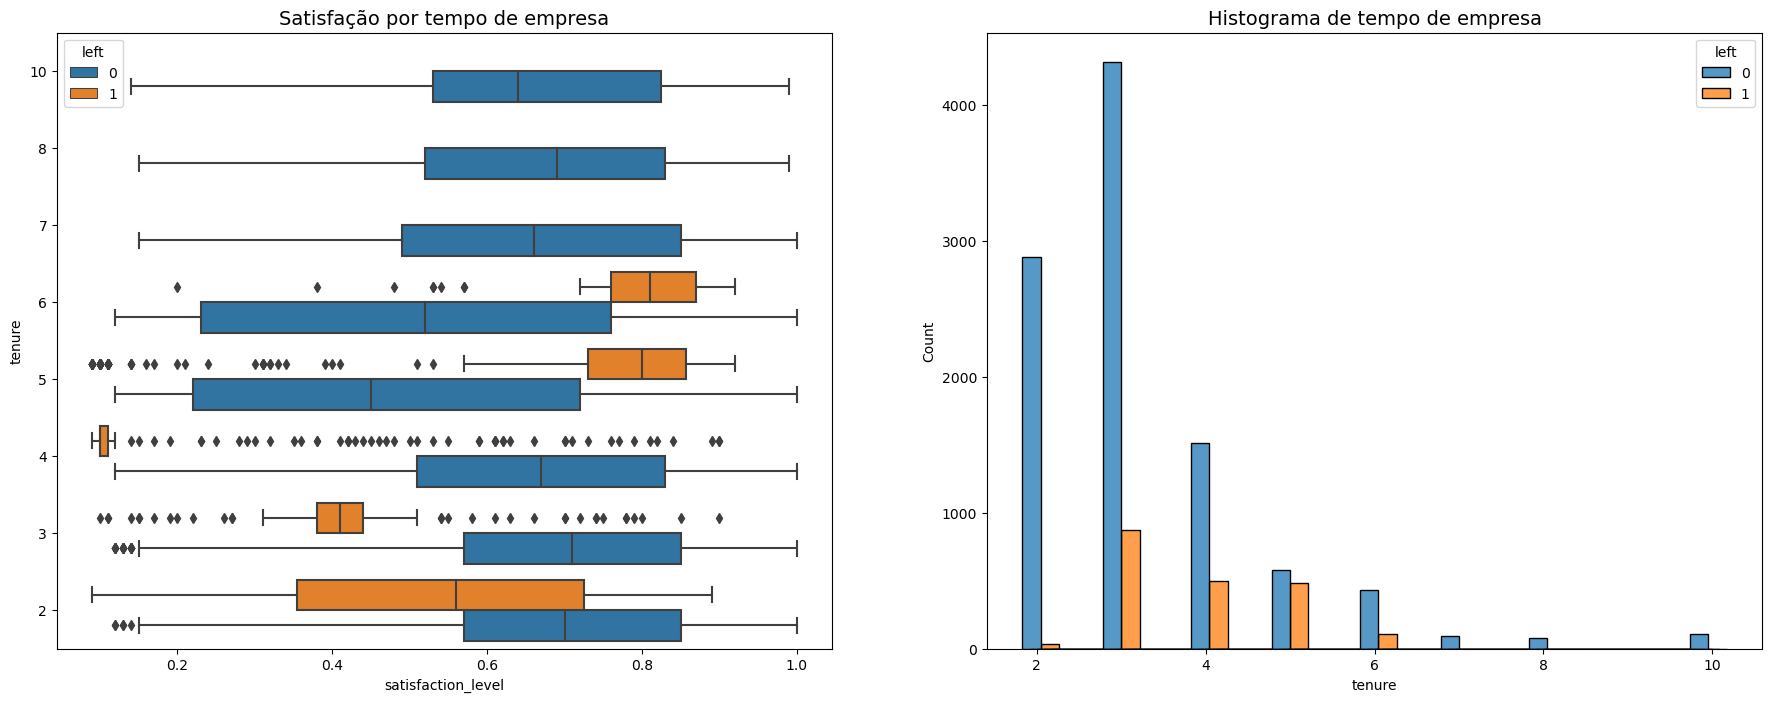

In [16]:
# Configurando figura e eixos
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot mostrando as distribuições de `satisfaction_level` por tempo de empresa, comparando funcionários que ficaram versus os que saíram
# Na legenda, 0 (cor azul) representa funcionários que não saíram, 1 (cor laranja) representa funcionários que saíram
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfação por tempo de empresa', fontsize='14')

# Histograma mostrando a distribuição de `tenure`, comparando funcionários que ficaram versus os que saíram
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histograma de tempo de empresa', fontsize='14')

plt.show();


Diversas observações podem ser extraídas desses gráficos, como:

 - Funcionários que saíram se enquadram em duas categorias gerais: funcionários insatisfeitos com menor tempo de empresa e funcionários muito satisfeitos com tempo de empresa médio.
 - Funcionários de quatro anos que saíram parecem ter um nível de satisfação bastante baixo. Vale a pena investigar mudanças na política da empresa que possam ter afetado pessoas especificamente no marco de quatro anos, se possível.
 - Os funcionários mais antigos não saíram. Seus níveis de satisfação alinhavam-se com os dos funcionários mais novos que ficaram.
 - O histograma mostra que há relativamente poucos funcionários com maior tempo de empresa. É possível que eles sejam os funcionários de maior ranking e mais bem pagos.

In [17]:
# Médias e medianas da satisfação dos funcionários que saíram e daqueles que ficaram
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

Conforme esperado, as pontuações médias e medianas de satisfação dos funcionários que saíram são mais baixas do que aquelas dos funcionários que ficaram. Curiosamente, entre os funcionários que ficaram, a pontuação média de satisfação parece estar ligeiramente abaixo da pontuação mediana. Isso indica que os níveis de satisfação entre aqueles que ficaram podem estar enviesados para a esquerda.

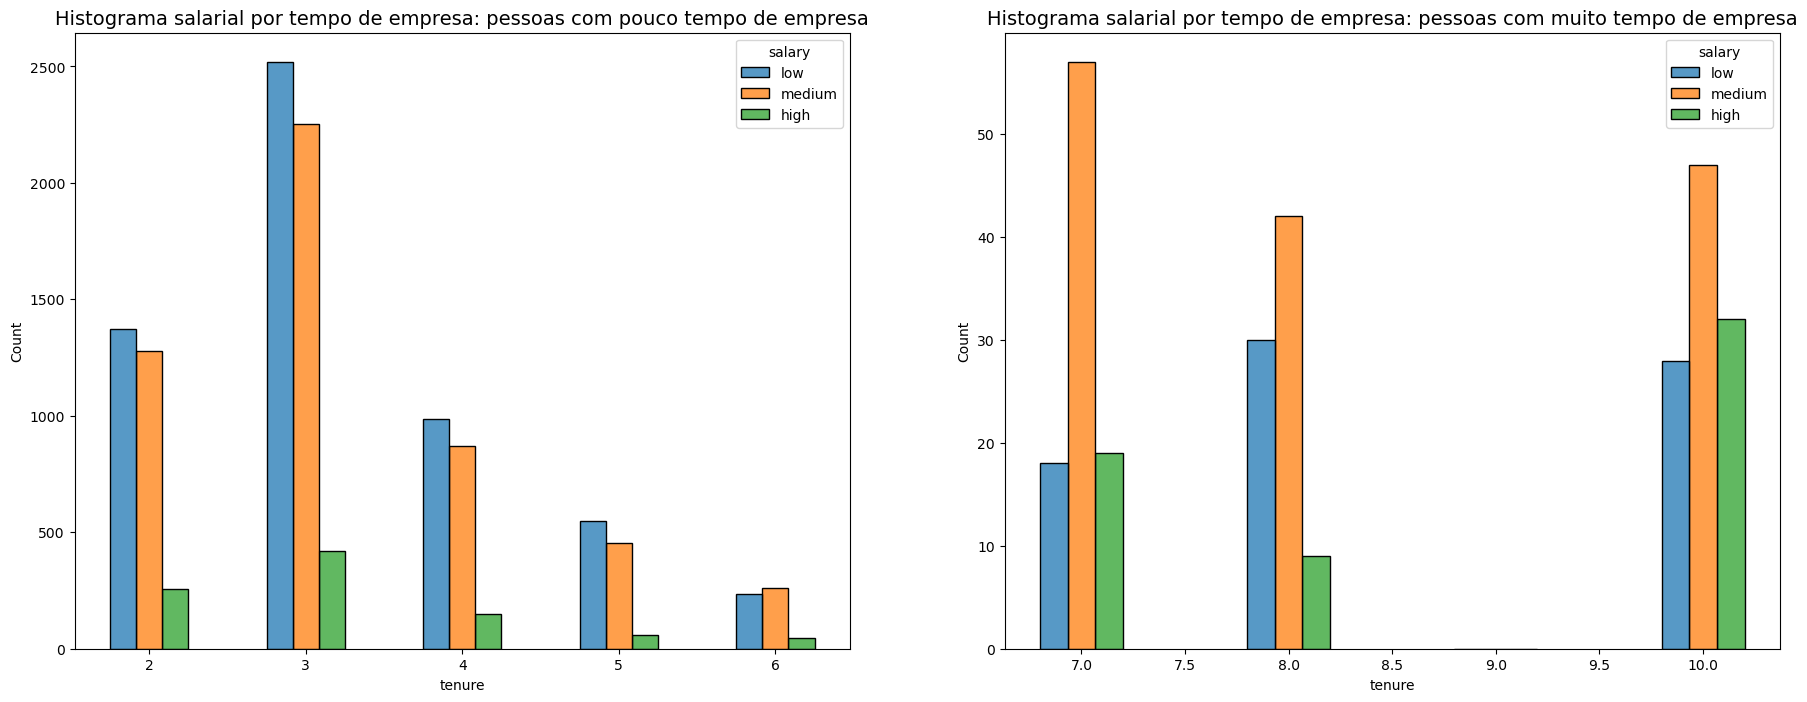

In [18]:
# Examinando os níveis salariais para diferentes tempos de empresa

# Configurando a figura e os eixos
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Definindo funcionários com pouco tempo de empresa
tenure_short = df1[df1['tenure'] < 7]

# Definindo funcionários com muito tempo de empresa
tenure_long = df1[df1['tenure'] > 6]

# Histograma para funcionários com pouco tempo de empresa
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Histograma salarial por tempo de empresa: pessoas com pouco tempo de empresa', fontsize='14')

# Histograma para funcionários com muito tempo de empresa
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Histograma salarial por tempo de empresa: pessoas com muito tempo de empresa', fontsize='14');


Os gráficos acima mostram que os funcionários com maior tempo de empresa não eram desproporcionalmente compostos por funcionários com salários mais altos.

O próximo gráfico servirá para analisar se há uma correlação entre trabalhar muitas horas e receber altas pontuações nas avaliações.

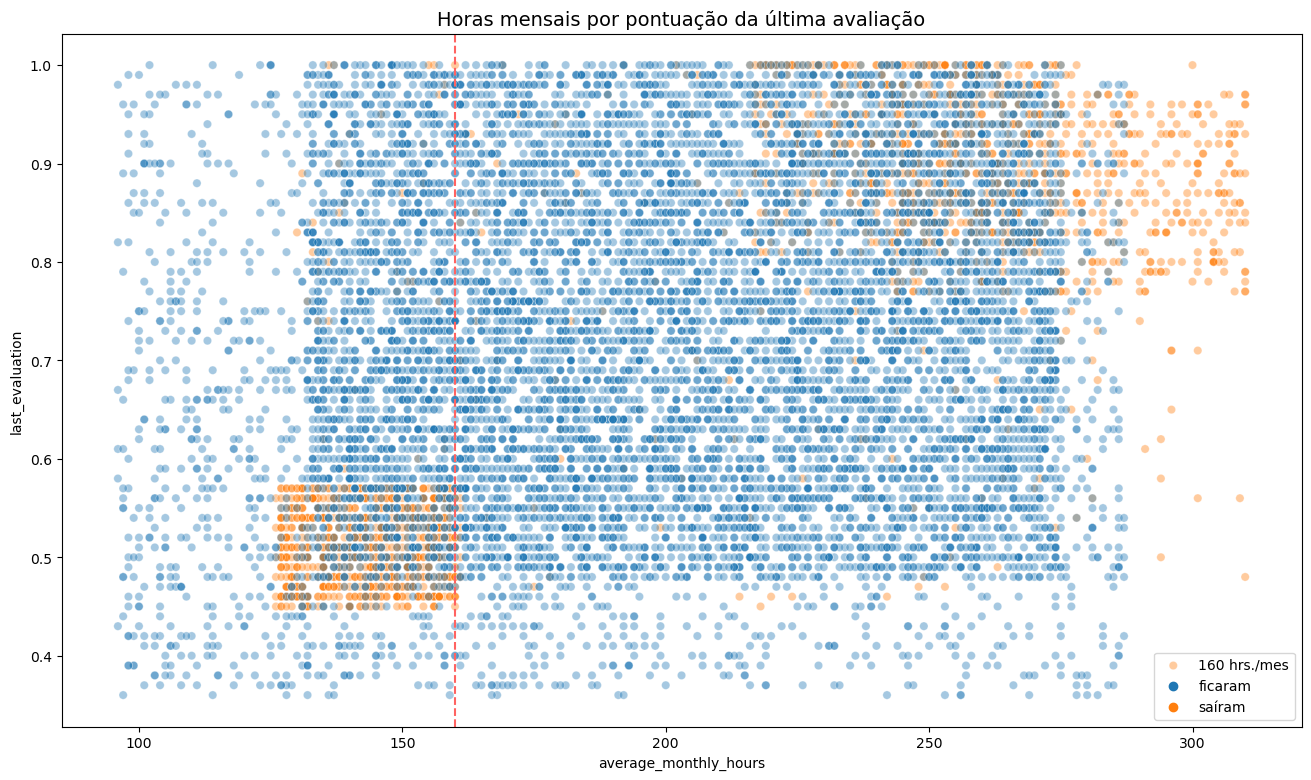

In [19]:
# Análise da relação entre horas trabalhadas e altas pontuações

# Histograma das variáveis `average_monthly_hours` versus `last_evaluation`
# Na legenda cor azul representa funcionários que não saíram, cor laranja representa funcionários que saíram
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', label='160 hrs./mes', ls='--')
plt.legend(labels=['160 hrs./mes', 'ficaram', 'saíram'])
plt.title('Horas mensais por pontuação da última avaliação', fontsize='14');


As seguintes observações podem ser feitas a partir do gráfico de dispersão acima:

 - O gráfico de dispersão indica dois grupos de funcionários que saíram: funcionários sobrecarregados que tiveram um desempenho muito bom e funcionários que trabalharam um pouco abaixo da média mensal nominal de 160 horas com pontuações de avaliação mais baixas.
 - Parece haver uma correlação entre as horas trabalhadas e a pontuação da avaliação.
Não há uma alta porcentagem de funcionários no quadrante superior esquerdo deste gráfico; mas trabalhar muitas horas não garante uma boa pontuação de avaliação.
 - A maioria dos funcionários desta empresa trabalha bem mais de 160 horas por mês.

O próximo gráfico servirá de análise para examinar se funcionários que trabalharam muitas horas foram promovidos nos últimos cinco anos.

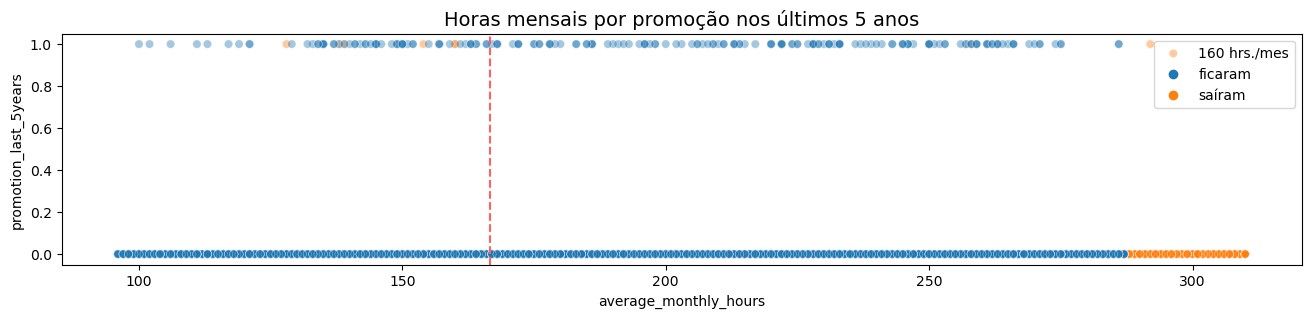

In [20]:
# Análise da relação entre `average_monthly_hours` e `promotion_last_5years`
# Na legenda, 0 (cor azul) representa funcionários que não saíram, 1 (cor laranja) representa funcionários que saíram
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', ls='--')
plt.legend(labels=['160 hrs./mes', 'ficaram', 'saíram'])
plt.title('Horas mensais por promoção nos últimos 5 anos', fontsize='14');


O gráfico acima mostra o seguinte:

- Uma ordem bastante baixa de funcionários que foram promovidos nos últimos cinco anos saíram.
- Um ordem baixa de funcionários que trabalharam mais horas foram promovidos.
- Todos os funcionários que saíram estavam trabalhando horas bastante longas.

O próximo gráfico mostra a distribuição dos funcionários que saíram pelos departamentos da empresa.

In [21]:
# Quantidade de funcionários por departamento
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

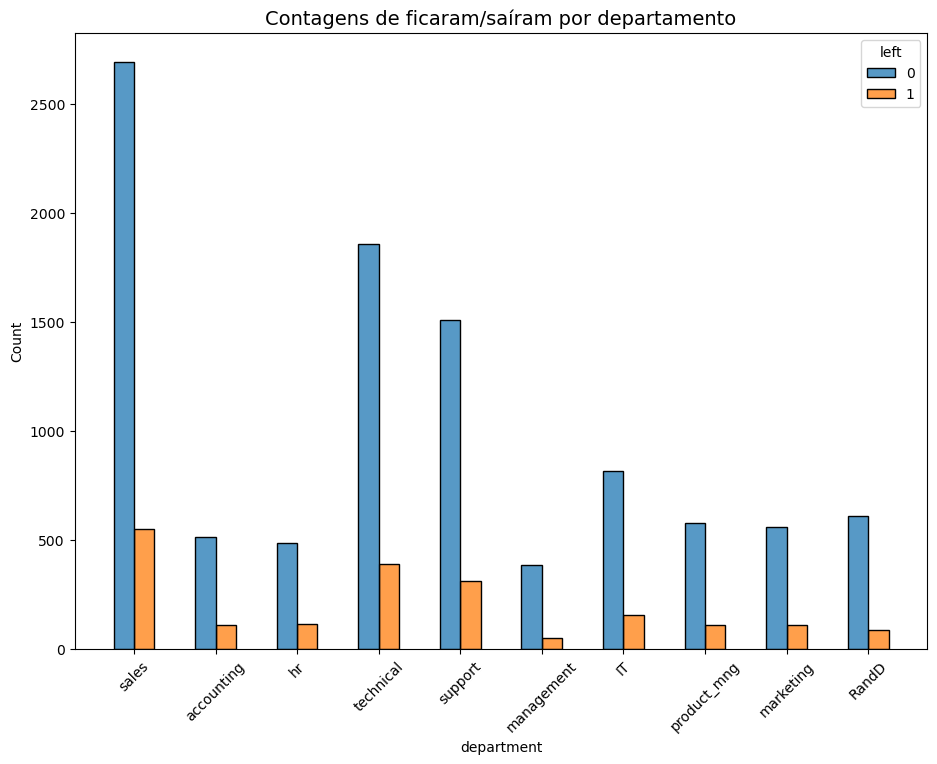

In [105]:
# Histograma para comparar a distribuição por departamento dos funcionários que saíram com a dos que não saíram
# Na legenda, 0 (cor azul) representa funcionários que não saíram, 1 (cor laranja) representa funcionários que saíram
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Contagens de ficaram/saíram por departamento', fontsize=14);


Parece não haver nenhum departamento que difere significativamente na sua proporção de funcionários que saíram em relação àqueles que ficaram.

O próximo gráfico será para analisar as correlações fortes entre as variáveis disponíveis.

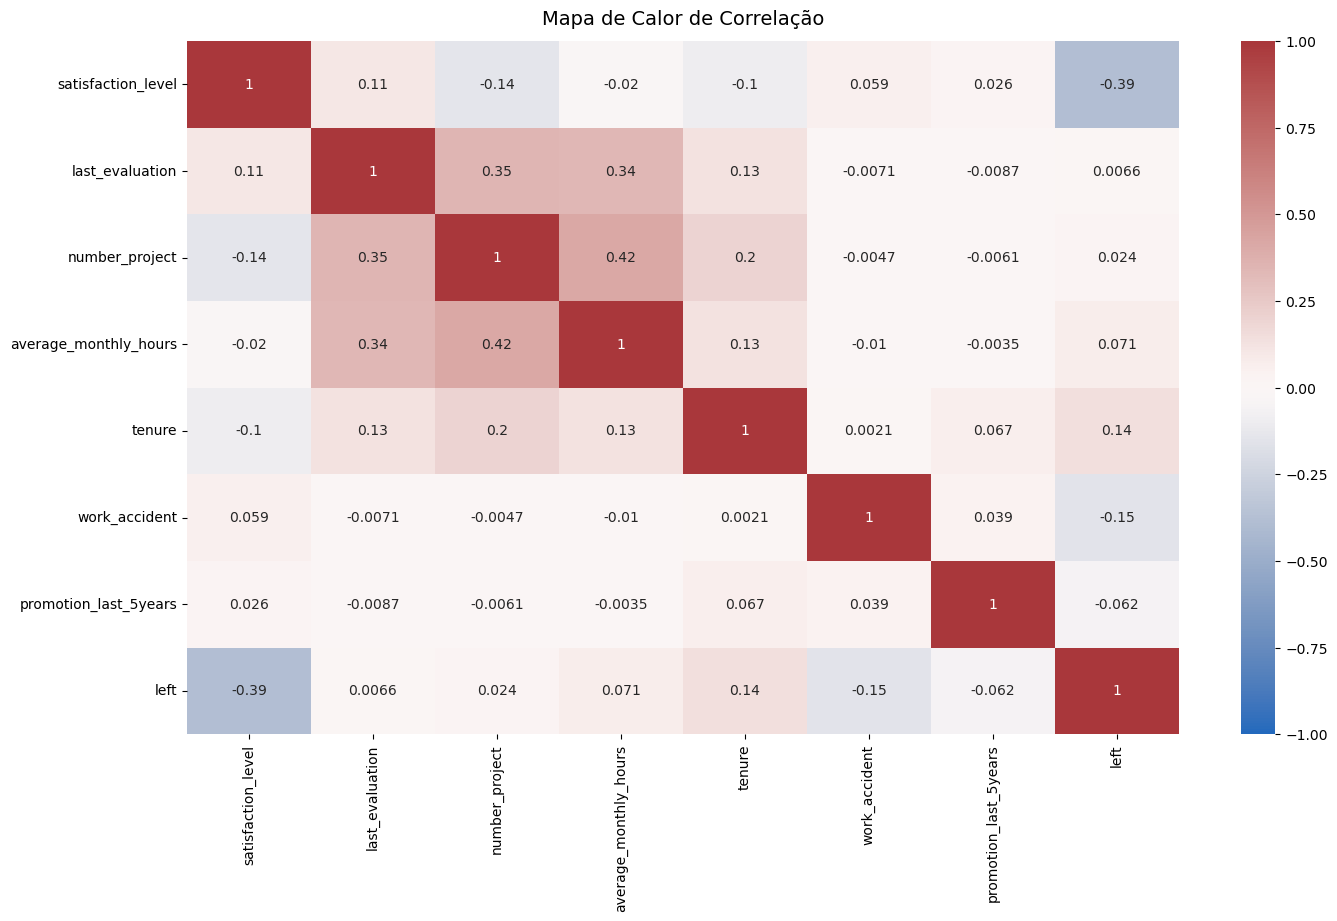

In [106]:
# Plotar um mapa de calor de correlação
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Mapa de Calor de Correlação', fontdict={'fontsize':14}, pad=12);

A correlação apresentada no heatmap confirma que o número de projetos, as horas mensais e as pontuações de avaliação têm alguma correlação positiva entre si, e se um funcionário deixa a empresa está 'negativamente correlacionado' com o nível de satisfação dele.

### Insights

Parece que os funcionários estão deixando a empresa como resultado de uma má gestão. A saída está ligada a jornadas de trabalho mais longas, muitos projetos e, geralmente, níveis mais baixos de satisfação. Pode ser frustrante trabalhar muitas horas e não receber promoções ou boas pontuações de avaliação. Há um grupo considerável de funcionários nesta empresa que provavelmente estão esgotados. Também parece que se um funcionário passou mais de seis anos na empresa, ele tende a não sair.

# CONSTRUÇÃO DOS MODELOS PREVENTIVOS: Construct Stage


Nesta etapa serão desenvolvidas as seguintes ações:
- Identificação dos modelos que são mais apropriados para o caso
- Construção do modelo
- Confirmação das suposições do modelo
- Avaliação dos resultados do modelo para determinar o quão bem o modelo escolhido se ajusta aos dados disponíveis

### Identificação do problema a proposto

O objetivo da etapa Analyze é prever se um funcionário deixará a empresa, onde este tipo de informação é uma variável alvo do tipo categórica (Deixou/Não Deixou). Portanto, esta etapa envolve classificação. Mais especificamente, trata-se de classificação binária, já que a variável de alvo `left` pode ser 1 (indicando que o funcionário saiu) ou 0 (indicando que o funcionário não saiu).

### Identificação do modelo mais apropriado para este problema

Já que a variável alvo é do tipo categórica, o modelo mais apropriado é o de Regressão Logística ou um modelo de Machine learning baseado no desenvolvimento em Árvore.

A análise começará com o modelo de Logistic Regression e depois partirá para o modelo de Decisão de Árvore.

In [24]:
# Aplicando one-hot as variáveis categóricas conforme necessário e salvando o dataframe resultante em uma nova variável
df_enc = pd.get_dummies(df1, prefix=['salario', 'depto'], columns = ['salary', 'department'], drop_first=False)

# Novo dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  left  salario_high  \
0       3              0                      0     1             0   
1       6              0                      0     1             0   
2       4              0                      0     1             0   
3       5              0                      0     1             0   
4       3              0                      0     1             0   

   salario_low  salario_medium  depto_IT  depto_RandD  depto_accounting  \
0            1               0         0            0                 0   
1            0               1         0            0                 0   
2            0               1         0            0                 0   
3            1               0         0            0                 0   
4            1               0         0            0                 0   

   depto_hr  depto_management  depto_marketing  depto_product_mng  \
0         0                 0                0                  0   
1         0                 0                0                  0   
2         0                 0                0                  0   
3         0                 0                0                  0   
4         0                 0                0                  0   

   depto_sales  depto_support  depto_technical  
0            1              0                0  
1            1              0                0  
2            1              0                0  
3            1              0                0  
4            1              0                0

O seguinte gráfico será um heatmap para visualizar como as variáveis de interesse (Nivel de satisfação, Última avaliação, Número de projetos, Mensal de horas trabalhadas e tempo de empresa) estão correlacionadas.

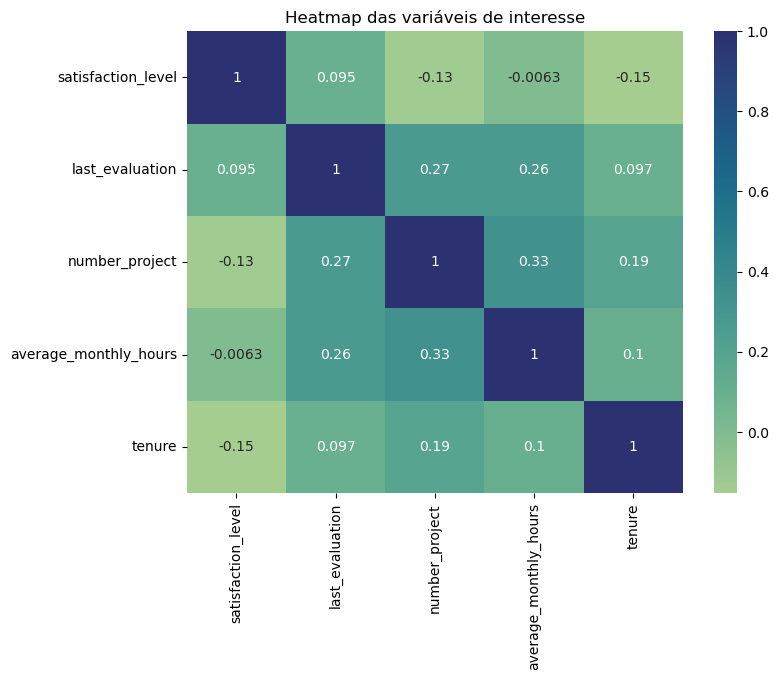

In [25]:
# Heatmap para avaliar como as variáveis de interesse estão correlacionadas
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap das variáveis de interesse')
plt.show()

O próximo gráfico servirá para visualizar o número de funcionários por departamento, comparando aqueles que saíram com os que não saíram.

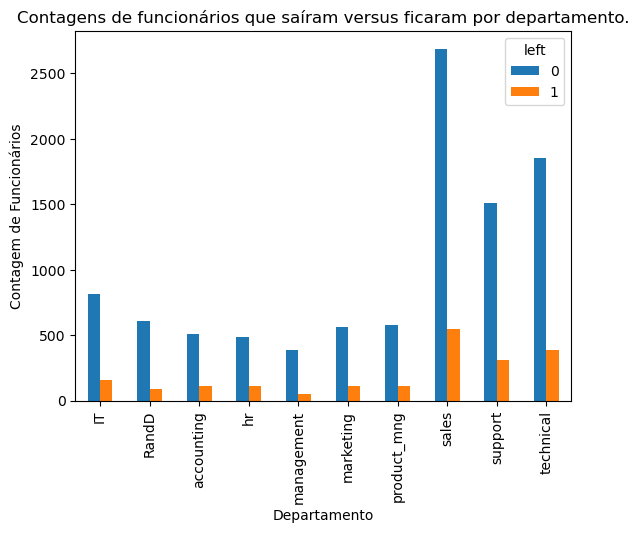

In [26]:
# O gráfico de barras auxilia a visualização do número de funcionários por departamento, comparando aqueles que saíram com os que não saíram
# Na legenda, 0 (cor azul) representa funcionários que não saíram, 1 (cor laranja) representa funcionários que saíram
pd.crosstab(df1["department"], df1["left"]).plot(kind ='bar')
plt.title('Contagens de funcionários que saíram versus ficaram por departamento.')
plt.ylabel('Contagem de Funcionários')
plt.xlabel('Departamento')
plt.show()

Já que a regressão logística é bastante sensível a outliers, serão removidos os outliers na coluna de tempo de empresa `tenure` que foram identificados anteriormente.

In [27]:
# Logistic Regression
# Selecionando as linhas sem outliers em `tenure` e salvando o dataframe resultante em uma nova variável
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# As primeiras linhas do novo dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  left  salario_high  \
0       3              0                      0     1             0   
2       4              0                      0     1             0   
3       5              0                      0     1             0   
4       3              0                      0     1             0   
5       3              0                      0     1             0   

   salario_low  salario_medium  depto_IT  depto_RandD  depto_accounting  \
0            1               0         0            0                 0   
2            0               1         0            0                 0   
3            1               0         0            0                 0   
4            1               0         0            0                 0   
5            1               0         0            0                 0   

   depto_hr  depto_management  depto_marketing  depto_product_mng  \
0         0                 0                0                  0   
2         0                 0                0                  0   
3         0                 0                0                  0   
4         0                 0                0                  0   
5         0                 0                0                  0   

   depto_sales  depto_support  depto_technical  
0            1              0                0  
2            1              0                0  
3            1              0                0  
4            1              0                0  
5            1              0                0

In [28]:
# Isolar a variável de resultado
y = df_logreg['left']

# As 5 primeiras linhas da variável alvo
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [109]:
# Isolando a variável alvo para termos somente as que variáveis que contribuirão para o modelo de predição
X = df_logreg.drop('left',axis=1)
X.shape

(11167, 20)

Abaixo ocorrerá a divsão dos dados para dados de treino e dados de teste.

In [108]:
# Divisão dos dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando as dimensões dos novos conjuntos resultantes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((9592, 19), (2399, 19), (9592,), (2399,))

In [31]:
# Construção um modelo de Logistic Regression e aplicando o Fit nos dados de treino
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [32]:
# Atribuindo o modelo de regressão logística para obter previsões no conjunto de teste
y_pred = log_clf.predict(X_test)

Abaixo será plotado o a Matrix Confusão para verificar o desempenho do modelo

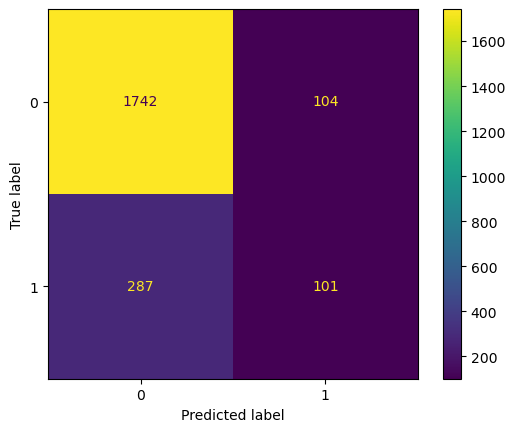

In [33]:
# Calculo dos valores para a matriz de confusão
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Criação da exibição da matriz de confusão
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot da matriz de confusão
log_disp.plot()

# Exibição do gráfico
plt.show()

O quadrante superior esquerdo exibe o número de verdadeiros negativos que o modelo foi capaz de prever.
O quadrante superior direito exibe o número de falsos positivos que o modelo fez a previsão.
O quadrante inferior esquerdo exibe o número de falsos negativos que o modelo fez a previsão.
O quadrante inferior direito exibe o número de verdadeiros positivos que o modelo foi capaz de prever.

Verdadeiros negativos: O número de pessoas que não saíram que o modelo previu corretamente que não sairiam.

Falsos positivos: O número de pessoas que não saíram que o modelo previu incorretamente como se tivessem saído.

Falsos negativos: O número de pessoas que saíram que o modelo previu incorretamente que não sairiam.

Verdadeiros positivos: O número de pessoas que saíram que o modelo previu corretamente como se tivessem saído.

Um modelo perfeito resultaria em todos os verdadeiros negativos e verdadeiros positivos, e nenhum falso negativo ou falso positivo.

Abaixo serão desenvolvidos os seguintes cálculos para avaliar o desempenho do modelo de regressão logística:
- precisão, 
- recall, 
- pontuação f1 e 
- métricas de acurácia 

In [34]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

Há uma divisão aproximada de 83%-17%. Portanto, os dados não estão perfeitamente equilibrados, mas também não estão muito desequilibrados. Se estivessem mais severamente desequilibrados, seria necessário adotar um rebalanceamento do sample para tornar os dados mais equilibrados. Neste caso, será utilizado os dados sem a aplicação da ação resolutiva mencionada.

In [35]:
# Criar relatório de classificação para o modelo de regressão logística
target_names = ['Previsto que não sairia', 'Previsto que sairia']
print(classification_report(y_test, y_pred, target_names=target_names))

                         precision    recall  f1-score   support

Previsto que não sairia       0.86      0.94      0.90      1846
    Previsto que sairia       0.49      0.26      0.34       388

               accuracy                           0.82      2234
              macro avg       0.68      0.60      0.62      2234
           weighted avg       0.80      0.82      0.80      2234



Os resultados acima mostram que o modelo de regressão logística alcançou uma precisão de 79%, recall de 82%, pontuação f1 de 80% (todas médias ponderadas) e acurácia de 82%. 

###  A partir de agora será utilizado abordagem utilizando modelagem por Árvore de Decisão e Foresta Randômica

In [36]:
# Encoding as variáveis categóricas
df2 = pd.get_dummies(df1)

In [37]:
# Isolando a variável alvo
y = df2['left']

# As cinco primeiras linhas da variável alvo `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
# Selecionando as features
X = df2.drop('left', axis=1)

# As cinco primeiras linhas das features `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  department_IT  \
0       3              0                      0              0   
1       6              0                      0              0   
2       4              0                      0              0   
3       5              0                      0              0   
4       3              0                      0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2                 1                   0                     0            0   
3                 1                   0                     0            0   
4                 1                   0                     0            0   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

In [39]:
# Divisão dos dados em dados de teste e dados de treino

# Criando os dados de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Criando os dados de teste e validando-os
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Árvore de Decisão - Primeiro pace

In [40]:
# Instanciando o modelo
tree = DecisionTreeClassifier(random_state=0)

# Atribuindo um dicionário de hiperparâmetros para pesquisa
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Atribuindo um dicionário de métricas de pontuação para capturar
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciando GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
# Ajustar o modelo de árvore de decisão aos dados de treinamento.
tree1.fit(X_tr, y_tr)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'accuracy', 'precision', 'recall'})

Identify the optimal values for the decision tree parameters.

In [42]:
# Identificar os optmial values para os parâmetros da árvore de decisão.
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [43]:
# Identificar a melhor pontuação AUC alcançada pelo modelo de árvore de decisão no conjunto de treinamento.
# Check best AUC score on CV
tree1.best_score_

0.9703634179699269

Esta é uma pontuação AUC forte, o que mostra que este modelo pode prever muito bem os funcionários que sairão.

In [44]:
def make_results(model_name:str, model_object, metric:str):

    # Dicionário que mapeia a métrica de entrada para o nome real da métrica no GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Todos os resultados do CV e colocá-los em um df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolar a linha do df com a pontuação máxima(metrica)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Acurácia, precisão, recall e pontuação f1 dessa linha
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Criar tabela de resultados
    table = pd.DataFrame()
    table = pd.DataFrame({'Tipo do Modelo': [model_name],
                          'Precisão': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Acurácia': [accuracy],
                          'Auc': [auc]
                        })
  
    return table

In [45]:
# Obtendo todos os CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

Tipo do Modelo  Precisão    Recall        F1  Acurácia       Auc
0  decision tree cv  0.922167  0.921337  0.921719  0.974007  0.970363

Dado essas pontuações do modelo de árvore de decisão podemos considerar que são fortes indicadores de um bom desempenho do modelo.



#### Floresta Aleatória - Round 1

In [107]:
# Construção de um modelo de floresta aleatória 

# Instaciando o modelo
rf = RandomForestClassifier(random_state=0)

# Atribuido um dicionário para os Hiperparânetros
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Atribuido um dicionário de score para as métricas que serão utilizadas
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciando o GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [59]:
# Ajustando o modelo à Floresta Aleatória
%time
rf1.fit(X_tr, y_tr) # --> Wall time: ~22min

Wall time: 0 ns


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'recall', 'f1', 'precision'})

In [55]:
# Definindo o caminho para salvar os resultados
path = 'C:/Users/Guilherme Brevilato/Documents/Arquivos Curso - Google Advanced/GoogleADA-main/7 - Capstone'

Será utilizado o método Pickle para agilizar a ánalise sempre que for necessário manipular os modelos

In [49]:
def write_pickle(path, model_object, save_as:str):
  

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [50]:
def read_pickle(path, saved_model_name:str):

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [51]:
# Criação do pickle
write_pickle(path, rf1, 'hr_rf1')

In [52]:
# Leitura do pickle
rf1 = read_pickle(path, 'hr_rf1')

In [57]:
# Identificando a melhor pontuação AUC alcançada pelo modelo de Randon Florest no conjunto de treinamento.
rf1.best_score_

0.9795790967836983

Identify the optimal values for the parameters of the random forest model.

In [62]:
# best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [63]:
# Obtenção de todos CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

     Tipo do Modelo  Precisão    Recall        F1  Acurácia       Auc
0  decision tree cv  0.922167  0.921337  0.921719  0.974007  0.970363
     Tipo do Modelo  Precisão    Recall        F1  Acurácia       Auc
0  random forest cv  0.943576  0.923021  0.933145  0.978037  0.979579


In [61]:
# utilização de uma função para obtenção das pontuações
def get_scores(model_name:str, model, X_test_data, y_test_data):


    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [64]:
# Obtenção os resultados no conjunto de validação para ambos os modelos
tree1_val_resultados = get_scores('árvore de decisão1 val', tree1, X_val, y_val)
rf1_val_resultados = get_scores('floresta aleatória1 val', rf1, X_val, y_val)

# Concatenação pontuações de validação em uma tabela
todos_val_resultados1 = [tree1_val_resultados, rf1_val_resultados]
todos_val_resultados1 = pd.concat(todos_val_resultados1).sort_values(by='AUC', ascending=False)
todos_val_resultados1

model    AUC  precision  recall     f1  accuracy
0  floresta aleatória1 val  0.954      0.955   0.917  0.936     0.979
0   árvore de decisão1 val  0.952      0.924   0.920  0.922     0.974

In [65]:
# Obtendo previsões nos dados de teste
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model    AUC  precision  recall     f1  accuracy
0  random forest1 test  0.955      0.961   0.917  0.938      0.98

As pontuações de teste são muito semelhantes às pontuações de validação, o que é bom. Parece ser um modelo forte. Como este conjunto de teste foi usado apenas para este modelo, pode-se ter mais confiança de que o desempenho no modelo construido com estes dados é representativo de como ele (o modelo) se comportará em novos dados não vistos.

#### Feature Engineering

In [66]:
# Remover `satisfaction_level` e salvar o dataframe resultante em uma nova variável
df3 = df1.drop('satisfaction_level', axis=1)

#  As primeiras linhas do novo dataframe
df3.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  promotion_last_5years department  salary  left  
0              0                      0      sales     low     1  
1              0                      0      sales  medium     1  
2              0                      0      sales  medium     1  
3              0                      0      sales     low     1  
4              0                      0      sales     low     1

In [67]:
# Coluna `overworked`. Por enquanto, é idêntica a average monthly hours.
df3['overworked'] = df3['average_monthly_hours']

# Inspeção valores máximos e mínimos de average monthly hours
print('Max horas:', df3['overworked'].max())
print('Min horas:', df3['overworked'].min())

Max horas: 310
Min horas: 96


166,00 é aproximadamente o número médio de horas mensais para alguém que trabalha 52 semanas por ano, 5 dias por semana, 8 horas por dia.

Pode-se definir como sobrecarga de trabalho (overworked) trabalhar mais de 175 horas por mês em média.

Para tornar a coluna `overworked` binária, será tomado a ação de reatribuir a coluna usando uma máscara booleana.
- `df3['overworked'] > 175` cria uma série de booleanos, consistindo em `True` para cada valor > 175 e `False` para cada valor ≤ 175
- `.astype(int)` converte todos os `True` para `1` e todos os `False` para `0`

In [68]:
# Transformação da variável `overworked` com o critério de horas de trabalho > 175 hrs/semana
df3['overworked'] = (df3['overworked'] > 175).astype(int)

# As cinco primeiras linhas da variável transformada
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [69]:
# Remoção a coluna `average_monthly_hours`
df3 = df3.drop('average_monthly_hours', axis=1)

# As primeiras linhas do dataframe resultante
df3.head()

last_evaluation  number_project  tenure  work_accident  \
0             0.53               2       3              0   
1             0.86               5       6              0   
2             0.88               7       4              0   
3             0.87               5       5              0   
4             0.52               2       3              0   

   promotion_last_5years department  salary  left  overworked  
0                      0      sales     low     1           0  
1                      0      sales  medium     1           1  
2                      0      sales  medium     1           1  
3                      0      sales     low     1           1  
4                      0      sales     low     1           0

In [70]:
# Codificação one-hot nas variáveis categóricas conforme necessário e salvar o dataframe resultante em uma nova variável
df4 = pd.get_dummies(df3)

# O novo dataframe
df4.head()

last_evaluation  number_project  tenure  work_accident  \
0             0.53               2       3              0   
1             0.86               5       6              0   
2             0.88               7       4              0   
3             0.87               5       5              0   
4             0.52               2       3              0   

   promotion_last_5years  left  overworked  department_IT  department_RandD  \
0                      0     1           0              0                 0   
1                      0     1           1              0                 0   
2                      0     1           1              0                 0   
3                      0     1           1              0                 0   
4                      0     1           0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  salary_high  salary_low  \
0                   0                     0            0           1   
1                   0                     0            0           0   
2                   0                     0            0           0   
3                   0                     0            0           1   
4                   0                     0            0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

In [71]:
# Isolando a variável de resultado
y = df4['left']

# As primeiras linhas de `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [72]:
# Seleção as características
X = df4.drop('left', axis=1)

# As primeiras linhas de `X`
X.head()

last_evaluation  number_project  tenure  work_accident  \
0             0.53               2       3              0   
1             0.86               5       6              0   
2             0.88               7       4              0   
3             0.87               5       5              0   
4             0.52               2       3              0   

   promotion_last_5years  overworked  department_IT  department_RandD  \
0                      0           0              0                 0   
1                      0           1              0                 0   
2                      0           1              0                 0   
3                      0           1              0                 0   
4                      0           0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  salary_high  salary_low  \
0                   0                     0            0           1   
1                   0                     0            0           0   
2                   0                     0            0           0   
3                   0                     0            0           1   
4                   0                     0            0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

Divisão dos dados em dados de treino, teste e validação

In [73]:
# Criação dos dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Criação dos dados de treino de validação
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Decision tree - Round 2

In [74]:
# Instanciando o modelo
tree = DecisionTreeClassifier(random_state=0)

# Criação do dicionário contendo os hiperparâmetros
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Atribuido um dicionário de score para as métricas que serão utilizadas
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciando GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [75]:
%%time
tree2.fit(X_tr, y_tr)

Wall time: 2.17 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'accuracy', 'precision', 'recall'})

In [76]:
# Checando os best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [77]:
# Checando a melhor pontuação de AUC no CV
tree2.best_score_

0.9534827790328492

In [78]:
# Obtenção de todos os CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
tree2_cv_results

Tipo do Modelo  Precisão    Recall        F1  Acurácia       Auc
0  decision tree2 cv  0.864826  0.902098  0.883024  0.960245  0.953483

#### Random forest - Round 2

In [79]:
# Instanciando o modelo
rf = RandomForestClassifier(random_state=0)

# Criação do dicionário contendo os hiperparâmetros
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Atribuido um dicionário de score para as métricas que serão utilizadas
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciando o GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [80]:
%%time
rf2.fit(X_tr, y_tr) # --> Wall time: 17min 5s

Wall time: 11min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'accuracy', 'precision', 'recall'})

In [81]:
# Criação de um pickle
write_pickle(path, rf2, 'hr_rf2')

In [82]:
# Leitura de um pickle
rf2 = read_pickle(path, 'hr_rf2')

In [83]:
# Checando best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [84]:
# Checando a melhor pontuação de AUC no CV
rf2.best_score_

0.9656664586139387

In [85]:
# Obtenção de todos os CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

      Tipo do Modelo  Precisão    Recall        F1  Acurácia       Auc
0  decision tree2 cv  0.864826  0.902098  0.883024  0.960245  0.953483
      Tipo do Modelo  Precisão    Recall        F1  Acurácia       Auc
0  random forest2 cv  0.909473  0.879506  0.894049  0.965388  0.965666


In [86]:
# Coleta da pontuação obtida pela validação
tree2_val_results = get_scores('decision tree2 val', tree2, X_val, y_val)
rf2_val_results = get_scores('random forest2 val', rf2, X_val, y_val)

# Concatenação da pontuação de validação em uma tabela
all_val_results2 = [tree2_val_results, rf2_val_results]
all_val_results2 = pd.concat(all_val_results2).sort_values(by='AUC', ascending=False)
all_val_results2

model    AUC  precision  recall     f1  accuracy
0  decision tree2 val  0.942      0.883   0.907  0.895     0.965
0  random forest2 val  0.933      0.905   0.884  0.895     0.965

In [110]:
# Obtendo previsões nos dados de teste
rf2_test_scores = get_scores('floresta aleatória teste', rf2, X_test, y_test)
rf2_test_scores

model    AUC  precision  recall     f1  accuracy
0  floresta aleatória teste  0.934      0.904   0.888  0.896     0.965

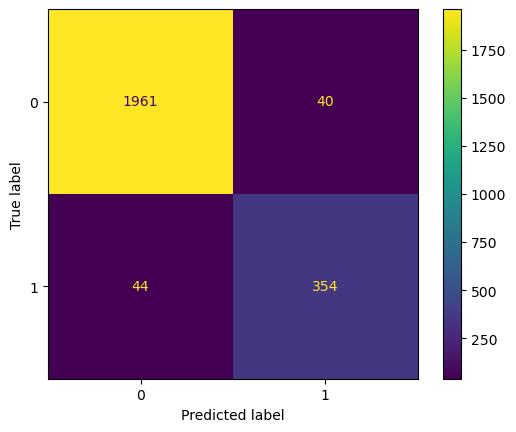

In [88]:
# Geração da matriz confusão
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plotando a matriz confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot();

#### Divisão da Decisão de Árvore

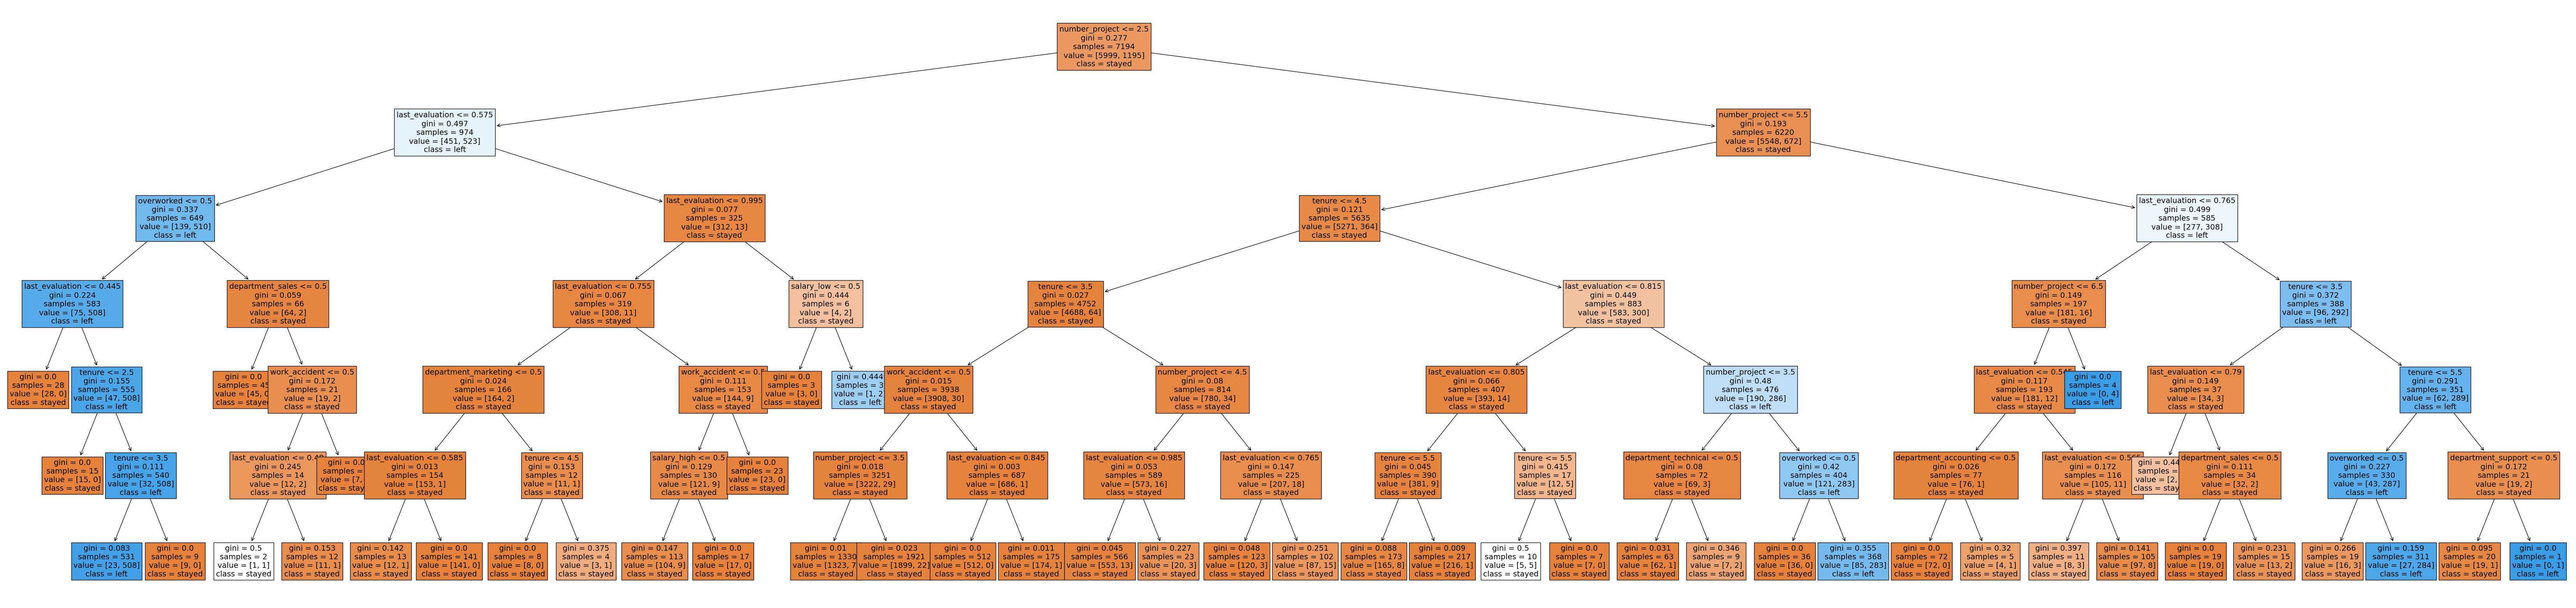

In [89]:
# Plotando a Árvore
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [90]:
#Árvore2
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Extração dos valores da variável gini_importance > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
number_project                0.381767
last_evaluation               0.353482
tenure                        0.169771
overworked                    0.091517
department_support            0.001099
salary_low                    0.000853
department_technical          0.000429
department_sales              0.000357
work_accident                 0.000282
department_accounting         0.000239
salary_high                   0.000120
department_marketing          0.000084

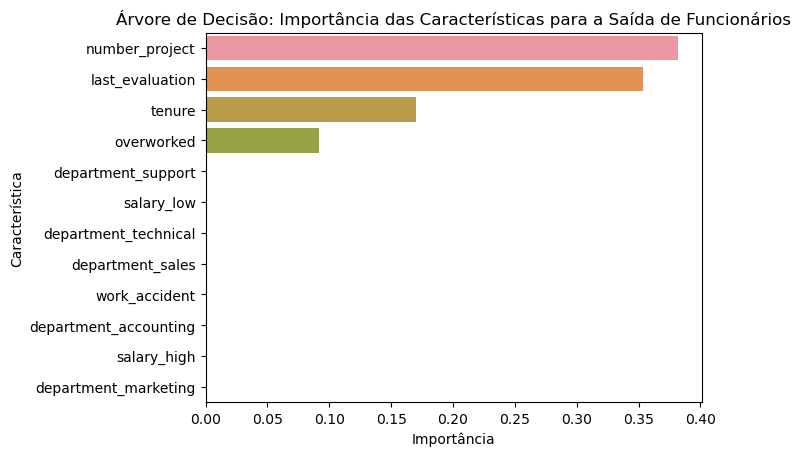

In [111]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Árvore de Decisão: Importância das Características para a Saída de Funcionários", fontsize=12)
plt.ylabel("Característica")
plt.xlabel("Importância")
plt.show()


#### Gráficos da Floresta Randomica

Iremos utilizar um método chamado feature importance (importância dos recursos). A importância de um recurso é calculada como a redução total (normalizada) do critério trazido por esse recurso. Também é conhecida como importância de Gini.

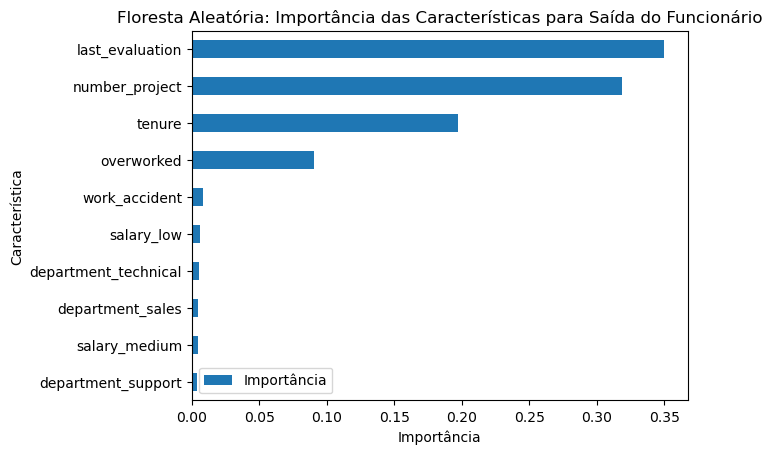

In [95]:
# Obtenção da importância das características
feat_impt = rf2.best_estimator_.feature_importances_

# Obtenção das 10 características mais importantes
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Obtenção dos nomes das características presentes no top 10 
feat = X.columns[ind]

# Filtrando a característica `feat_impt` 
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Característica":feat,"Importância":feat_impt})
y_sort_df = y_df.sort_values("Importância")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Característica",y="Importância")

ax1.set_title("Floresta Aleatória: Importância das Características para Saída do Funcionário", fontsize=12)
ax1.set_ylabel("Característica")
ax1.set_xlabel("Importância")

plt.show()

O gráfico acima mostra que, neste modelo de floresta aleatória, `last_evaluation`, `number_project`, `tenure`, `overworked`, `work_accident` e `salary_low` têm a maior importância, nesta ordem. Estas variáveis são as mais úteis para prever a variável de resultado, `left`.

# EXECUÇÃO: Execute Stage
- Interpretar o desempenho e os resultados do modelo
- Compartilhar etapas acionáveis com as partes interessadas

## Resultados e avaliação

**Principais insights dos modelos:**
1. O modelo de Floresta Aleatória (Random Forest) superou significativamente o modelo de Regressão Logística em termos de precisão na previsão da rotatividade de funcionários.
2. As variáveis mais importantes para a previsão incluem o número de projetos, a última avaliação do funcionário, o tempo de serviço e a sobrecarga de trabalho.

**Recomendações de negócios com base nos modelos construídos:**

1. **Gerenciamento de carga de trabalho:** Dado que a sobrecarga de trabalho é uma variável importante na previsão da rotatividade de funcionários, a empresa deve avaliar e otimizar a carga de trabalho dos funcionários para garantir que não estejam sobrecarregados.

2. **Avaliação de desempenho e feedback:** A última avaliação do funcionário é uma variável crítica. É interessante que a  empresa adote práticas de orientação aos funcionários e feedback pontuais visando auxiliar a construção de carreira e longevidade na empresa de cada colaborador. 

3. **Gestão de Projetos:** O número de projetos também é relevante. A empresa deve considerar a distribuição adequada de projetos entre os funcionários para evitar sobrecarregar alguns deles.

4. **Retenção de talentos:** Concentre esforços na retenção dos funcionários mais valiosos, identificados por meio das variáveis importantes. Isso pode envolver iniciativas de reconhecimento, desenvolvimento de carreira e treinamento.

**Possíveis melhorias no modelo:**
O modelo pode ser melhorado considerando o seguinte:

1. **Feature Engineering:** Pode ser benéfico criar novas características com base nas existentes ou transformar as características existentes para melhorar a previsão.

2. **Ajuste de Hiperparâmetros:** Ajustar os hiperparâmetros do modelo de Floresta Aleatória pode melhorar ainda mais seu desempenho.

3. **Coleta de Dados Adicionais:** Considerar a inclusão de dados adicionais, como informações sobre cultura organizacional, para um modelo mais completo.

**Outras questões que podem ser abordadas:**
Com base nos dados e modelos, outras questões que podem ser abordadas incluem:

1. Qual é o custo financeiro estimado da rotatividade de funcionários para a empresa?
2. Quais são as características comuns dos funcionários que são promovidos nos últimos 5 anos?
3. Como a satisfação do funcionário se correlaciona com a rotatividade?

**Recursos utilizados:**
- Dados do Kaggle: Os dados foram obtidos a partir do conjunto de dados disponível no Kaggle, embora você não tenha fornecido um link direto para o conjunto de dados específico.
- Ferramentas de modelagem: Para construir os modelos, foram utilizadas bibliotecas de aprendizado de máquina, como scikit-learn para Python.

**Considerações éticas:**
Ao lidar com dados de funcionários, é importante garantir a privacidade e a confidencialidade dos dados pessoais. Também é essencial evitar qualquer viés injusto nas decisões ou nas análises. É importante que a empresa siga as regulamentações de proteção de dados e promova práticas éticas em todo o processo de análise de dados e tomada de decisões.

